In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
import datetime
import matplotlib as mpl

In [3]:
%matplotlib inline

In [4]:
fn="data2.nc"
ds = nc.Dataset(fn)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CO Air Pollutant ANALYSIS at 1 levels
    institution: Data produced by Meteo France
    source: Data from ENSEMBLE model
    history: Model ENSEMBLE ANALYSIS
    ANALYSIS: Europe, 20201114-20201120+[0H_23H]
    summary: ENSEMBLE model hourly ANALYSIS of CO concentration at 1 levels from 20201114-20201120+[0H_23H] on Europe
    project: MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)
    dimensions(sizes): longitude(98), latitude(80), level(1), time(168)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), float32 level(level), float32 time(time), float32 co_conc(time,level,latitude,longitude)
    groups: 


<ipython-input-4-61d7cf950e97>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(ds)


In [5]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (98,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (80,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    long_name: level
    units: m
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: ANALYSIS time from 20201114
    units: hours
unlimited dimensions: time
current shape = (168,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 co_conc(time, level, latitude, longitude)
    _FillValue: -999.0
    species: Carbon Monoxide
  

<ipython-input-5-f27cf27a8065>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(var)


In [6]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 98
<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 80
<class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 1
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 168


<ipython-input-6-5a8b7615d7a2>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(dim)


In [7]:
lon=ds['longitude'][:]
lat=ds['latitude'][:]

In [8]:
alldata=[]
for t in range(ds['time'].shape[0]):
    alldata.append(ds['co_conc'][t,0,:,:])


<AxesSubplot:>

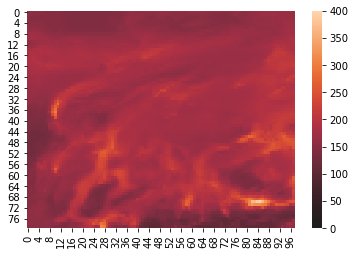

In [24]:
sns.heatmap(alldata[10],vmin=0, vmax=400,center=1)

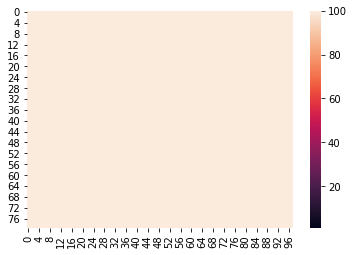

In [10]:
fig = plt.figure()
data = np.random.rand(10, 10)
sns.heatmap(alldata[0], vmax=.8, square=True)

def init():
    sns.heatmap(np.zeros((len(lon),len(lot))), vmax=.8, square=True, cbar=False)

def animate(i):
    data=alldata[i]
    sns.heatmap(data, vmax=.8, square=True, cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(alldata), repeat = False)